# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
df_fatalities.shape

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)


(2535, 14)

In [ ]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
df_fatalities.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
print(df_hh_income.isna().any())
print(df_pct_poverty.isna().any())
print(df_pct_completed_hs.isna().any())
print(df_share_race_city.isna().any())
df_fatalities.isna().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool
Geographic Area    False
City               False
poverty_rate       False
dtype: bool
Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool
Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool


,0
id,False
name,False
date,False
manner_of_death,False
armed,True
age,True
gender,False
race,True
city,False
state,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
print(df_hh_income.fillna(0,inplace= True))
print(df_pct_poverty.fillna(0,inplace = True))
print(df_pct_completed_hs.fillna(0,inplace = True))
print(df_share_race_city.fillna(0,inplace = True))
df_fatalities.fillna(0,inplace=True)

None
None
None
None


In [ ]:
print(df_hh_income.duplicated().any())
print(df_pct_poverty.duplicated().any())
print(df_pct_completed_hs.duplicated().any())
print(df_share_race_city.duplicated().any())
df_fatalities.duplicated().any()

False
False
False
False


False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df1 = df_pct_poverty["Geographic Area"].value_counts().reset_index(name = "count")
df1 = df1[::-1]
df1.head()

,Geographic Area,count
50,DC,1
49,RI,36
48,DE,77
47,NH,97
46,VT,121


In [ ]:
bar = px.bar(df1, x = "count",y = "Geographic Area",orientation = "h",color = df1["count"],color_continuous_scale = px.colors.sequential.matter)
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
print(df_pct_completed_hs.sort_values(by="percent_completed_hs",ascending = False).max())
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-', 0)
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

print(df_pct_completed_hs.sort_values(by="percent_completed_hs",ascending = False).min())

Geographic Area                  WY
City                    Zwolle town
percent_completed_hs           99.9
dtype: object
Geographic Area                                     AK
City                    Aaronsburg CDP (Centre County)
percent_completed_hs                              0.00
dtype: object


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:

df1= df_pct_completed_hs.groupby("City",as_index= False).agg({"percent_completed_hs":pd.Series.mean}).head(20)




In [ ]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace('-', 0)
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
df2 = df_pct_poverty.groupby("City").agg({"poverty_rate":pd.Series.mean}).head(20)

merged_df = pd.merge(df1,df2,on = "City")
merged_df.head()

,City,percent_completed_hs,poverty_rate
0,Aaronsburg CDP (Centre County),92.20,8.50
1,Aaronsburg CDP (Washington County),83.10,29.50
2,Abanda CDP,21.20,78.80
3,Abbeville city,72.00,33.45
4,Abbeville town,80.00,10.40


<ipython-input-558-3f9abecf7ebc>:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



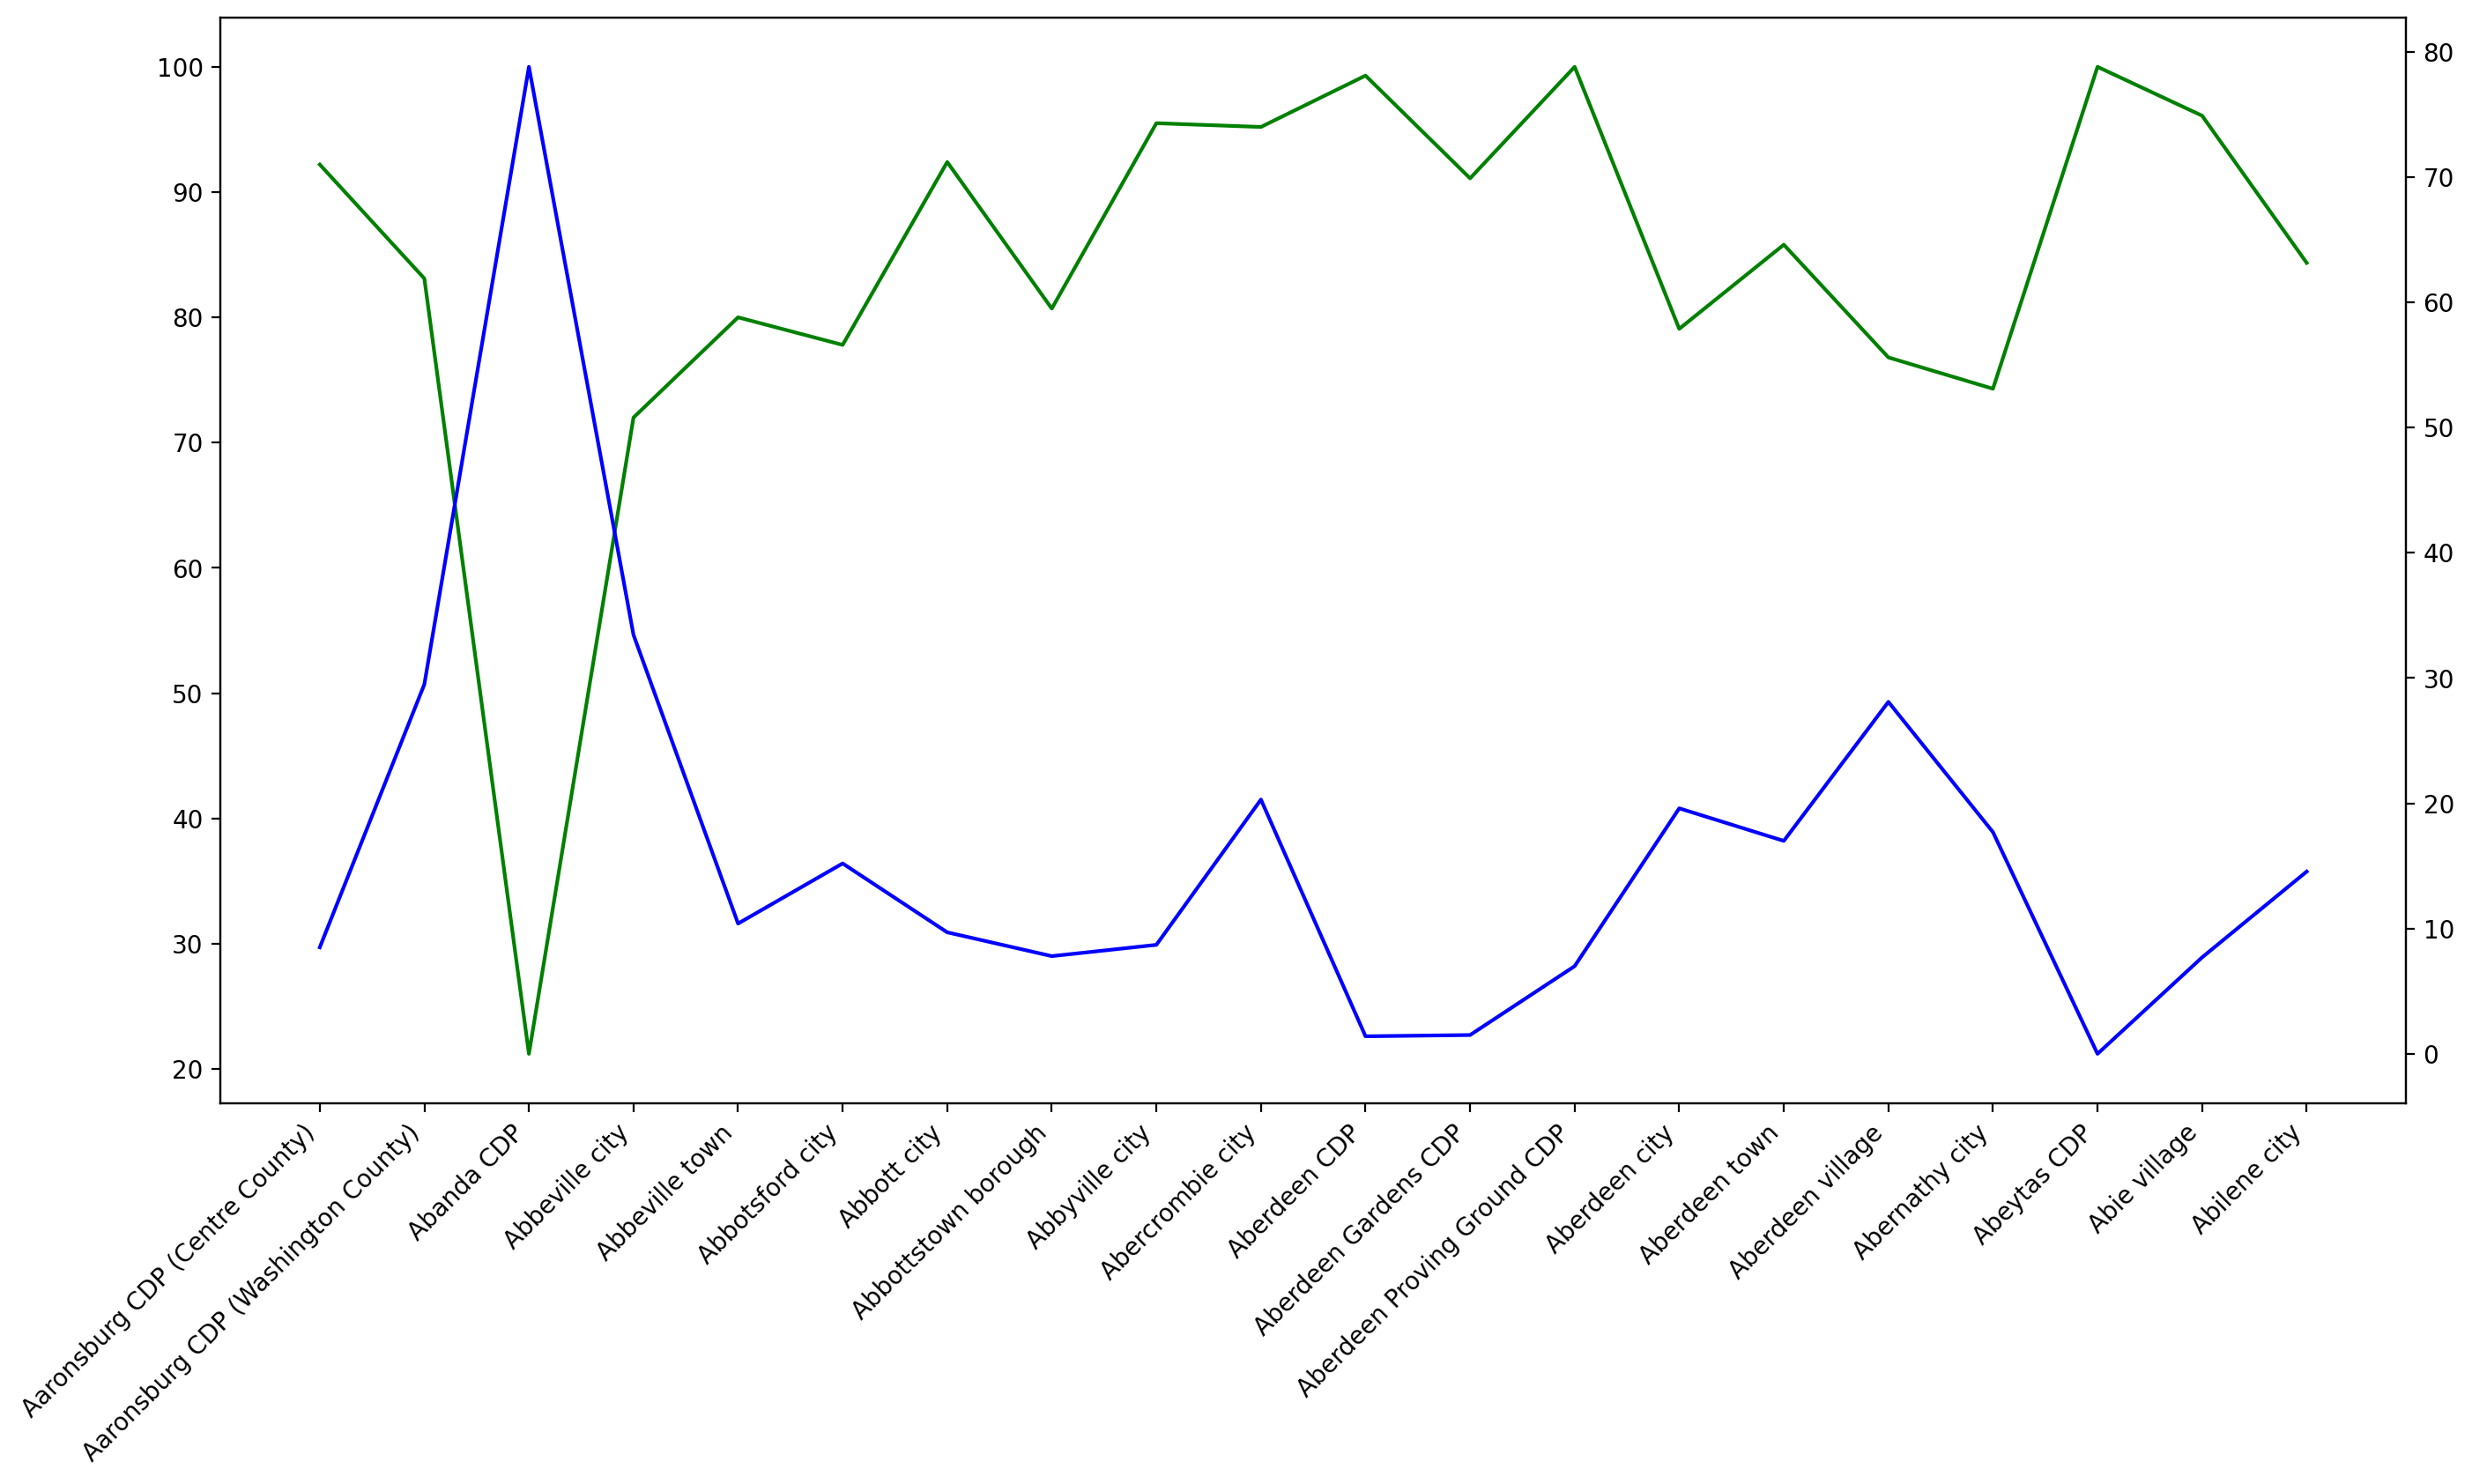

In [ ]:
plt.figure(figsize = (16,8),dpi = 200)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(merged_df["City"],merged_df["percent_completed_hs"],color = "g")
ax2.plot(merged_df["City"],merged_df["poverty_rate"],color = "b")
ax1.set_xticklabels(merged_df["City"], rotation=45, ha='right')
plt.show()

<ipython-input-559-dee7eff8d101>:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



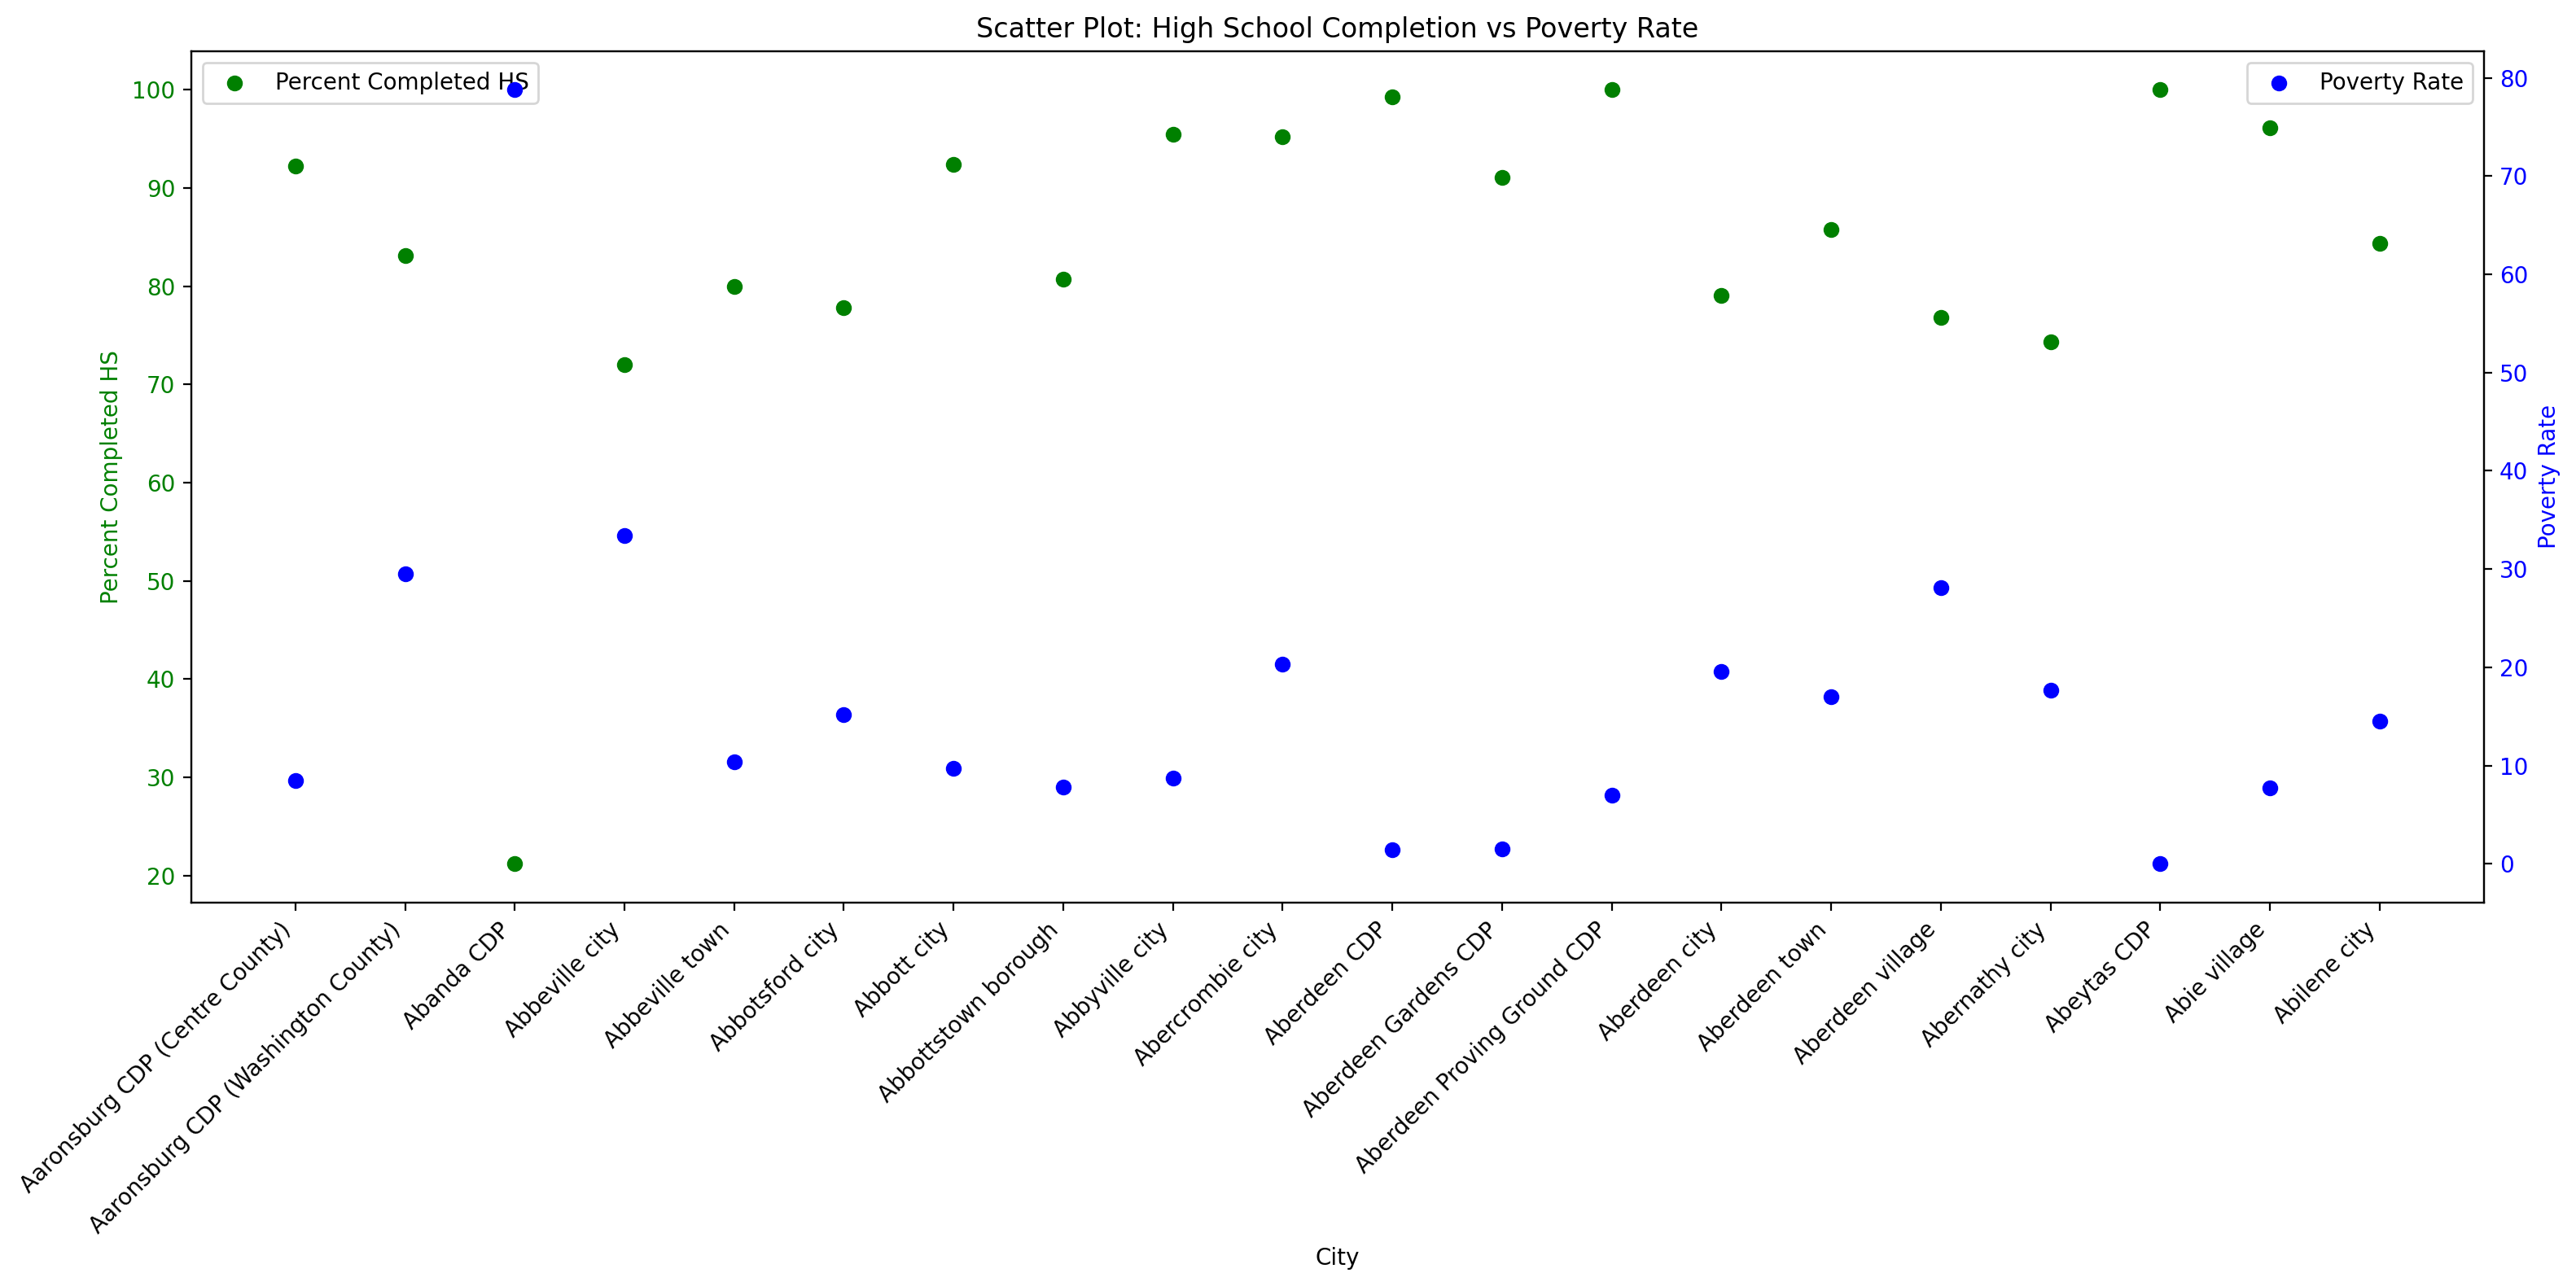

In [ ]:
# Create the first axis
plt.figure(figsize = (16,8),dpi = 200)
ax1 = plt.gca()
ax2 = ax1.twinx()  # Secondary y-axis

# Scatter plot on the primary y-axis
ax1.scatter(merged_df["City"], merged_df["percent_completed_hs"], color="g", label="Percent Completed HS")
ax1.set_ylabel("Percent Completed HS", color="g")
ax1.tick_params(axis='y', labelcolor="g")

# Scatter plot on the secondary y-axis
ax2.scatter(merged_df["City"], merged_df["poverty_rate"], color="b", label="Poverty Rate")
ax2.set_ylabel("Poverty Rate", color="b")
ax2.tick_params(axis='y', labelcolor="b")

# Add x-axis label
ax1.set_xlabel("City")

# Adjust tick labels for better readability (for long city names)
ax1.set_xticklabels(merged_df["City"], rotation=45, ha='right')


# Add a title
plt.title("Scatter Plot: High School Completion vs Poverty Rate")

# Add legends for clarity
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

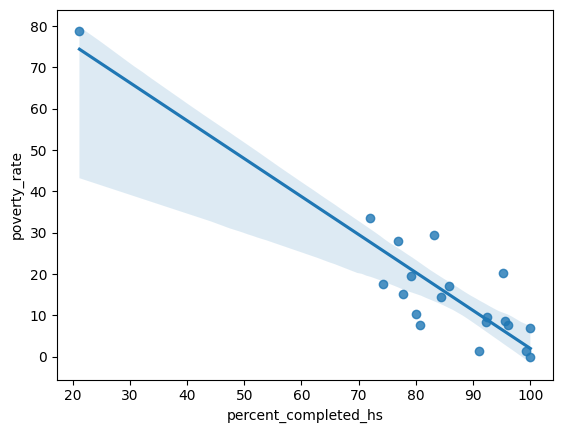

In [ ]:
sns.regplot(data = merged_df,x= "percent_completed_hs",y="poverty_rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
# Replace "-" with 0 and then convert the columns to numeric
# columns_to_convert = ["share_white", "share_black", "share_native_american", "share_asian", "share_native_american"]


df_share_race_city["share_white"] = df_share_race_city["share_white"].replace("(X)",0).apply(pd.to_numeric)
df_share_race_city["share_black"] = df_share_race_city["share_black"].replace("(X)",0).apply(pd.to_numeric)
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].replace("(X)",0).apply(pd.to_numeric)
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].replace("(X)",0).apply(pd.to_numeric)
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].replace("(X)",0).apply(pd.to_numeric)




In [ ]:
df = df_share_race_city.groupby("Geographic area",as_index = False).agg({"share_white":pd.Series.mean,"share_black":pd.Series.mean,
                                                                    "share_asian":pd.Series.mean,"share_hispanic":pd.Series.mean})

df = df.head(20)

In [ ]:
df_long = df.melt(id_vars=["Geographic area"], var_name="Race", value_name="Share")

# Create the horizontal bar chart using Plotly Express
fig = px.bar(df_long,
             x="Share",
             y="Geographic area",
             color="Race",
             orientation="h",  # horizontal bars
             title="Race Distribution Across US States",
             labels={"Share": "Percentage of Population", "State": "US State"},
             color_discrete_sequence=px.colors.qualitative.Set2)  # Color palette

# Show the plot
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df = df_fatalities.race.value_counts().reset_index(name = "count")


In [ ]:

fig = px.pie(df,values = "count",names = "race")
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
df_fatalities.gender.value_counts()

,count
gender,
M,2428
F,107


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
df1 = df_fatalities.groupby("manner_of_death")["gender"].value_counts().unstack(fill_value=0).reset_index()
df1.head()


gender,manner_of_death,F,M
0,shot,102,2261
1,shot and Tasered,5,167


In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


<Axes: xlabel='manner_of_death', ylabel='age'>

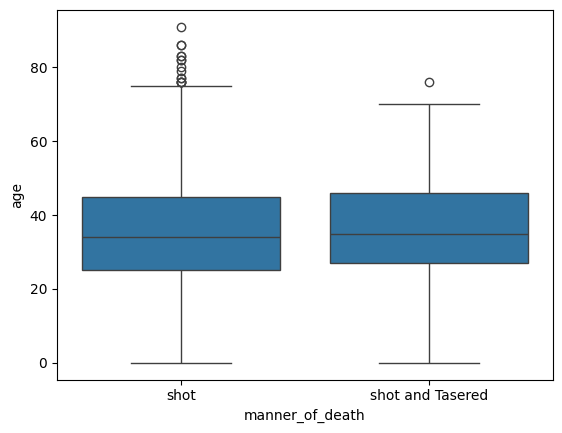

In [ ]:
sns.boxplot(data = df_fatalities,x = "manner_of_death",y="age")

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
armed = (df_fatalities["armed"] != "unarmed").sum()
unarmed = (df_fatalities["armed"] == "unarmed").sum()
per = (armed/(armed + unarmed))*100
per = per.round(2)
per

93.25

In [ ]:
df = df_fatalities[df_fatalities["armed"] != "unarmed"]
df = df["armed"].value_counts().reset_index(name = "count").head(10)
df = df[::-1]

In [ ]:
bar = px.bar(df,x = "count",y = "armed",orientation = "h",color = df["count"],color_continuous_scale = px.colors.sequential.matter)
bar.show()

In [ ]:
gun = (df_fatalities["armed"] == "gun").sum()
print(gun)
print(unarmed)

1398
171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
val = (df_fatalities["age"] < 25).sum()
print(val)

527


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:
df = df_fatalities.age.value_counts().reset_index(name = "count")

Create a seperate KDE plot for each race. Is there a difference between the distributions?

<Axes: xlabel='count', ylabel='Count'>

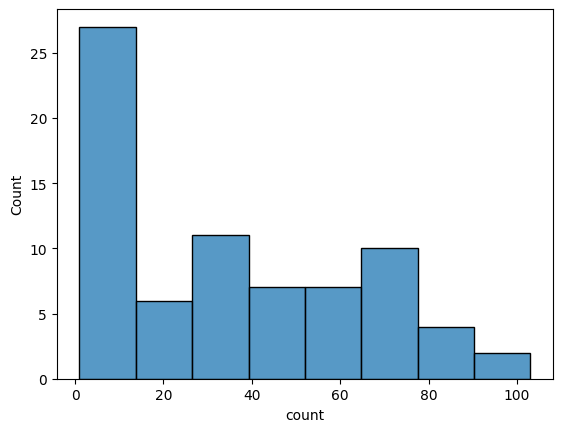

In [ ]:
sns.histplot(data = df, x = "count")

<Axes: ylabel='Density'>

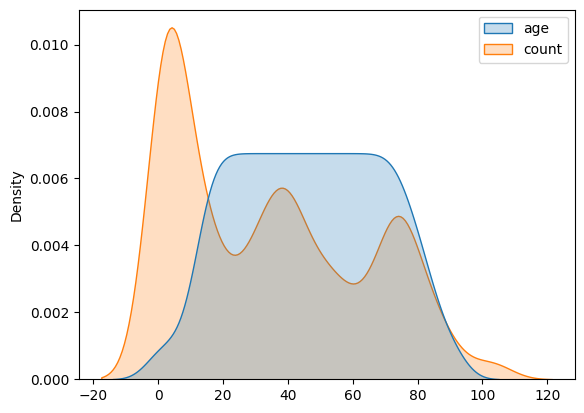

In [ ]:
sns.kdeplot(df,bw_adjust=0.5,fill = True)

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
df = df_fatalities.race.value_counts().reset_index(name= "count")
df

,race,count
0,W,1201
1,B,618
2,H,423
3,0,195
4,A,39
5,N,31
6,O,28


In [ ]:
bar = px.bar(df,x = "race",y = "count")
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
non_mental = (df_fatalities.signs_of_mental_illness == False).sum()
non_mental
mental = (df_fatalities.signs_of_mental_illness == True).sum()
mental

633

In [ ]:
per = (mental/(mental + non_mental))*100
per.round(2)

24.97

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
df = df_fatalities.city.value_counts().reset_index(name = "count")
df = df.head(10)
df = df[::-1]

In [ ]:
bar = px.bar(df,x = "count",y = "city",color = df["count"],color_continuous_scale = px.colors.sequential.matter)
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
df1 = df_fatalities.groupby(["city","state"])["race"].value_counts().reset_index()
df1 = df1.sort_values(by = "count",ascending = False)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
df1 = df_fatalities.state.value_counts().reset_index(name = "count")
df1.head()
fig = px.choropleth(df1,locations = "state",color = "count",color_continuous_scale = px.colors.sequential.matter,hover_name = "state")
fig.update_layout(coloraxis_showscale = True)
fig.show()

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

<ipython-input-589-fef38879af18>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df = df_fatalities.date.value_counts().reset_index(name = "count")
df = df.sort_values(by = "date",ascending = False)
df.date = df.date.dt.to_period("M")
monthly_deaths = df.groupby('date')['count'].sum().reset_index()
monthly_deaths.head()
monthly_deaths['date'] = monthly_deaths['date'].dt.to_timestamp()
# Check if columns have the same length
print(monthly_deaths['date'].shape, monthly_deaths['count'].shape)


(36,) (36,)


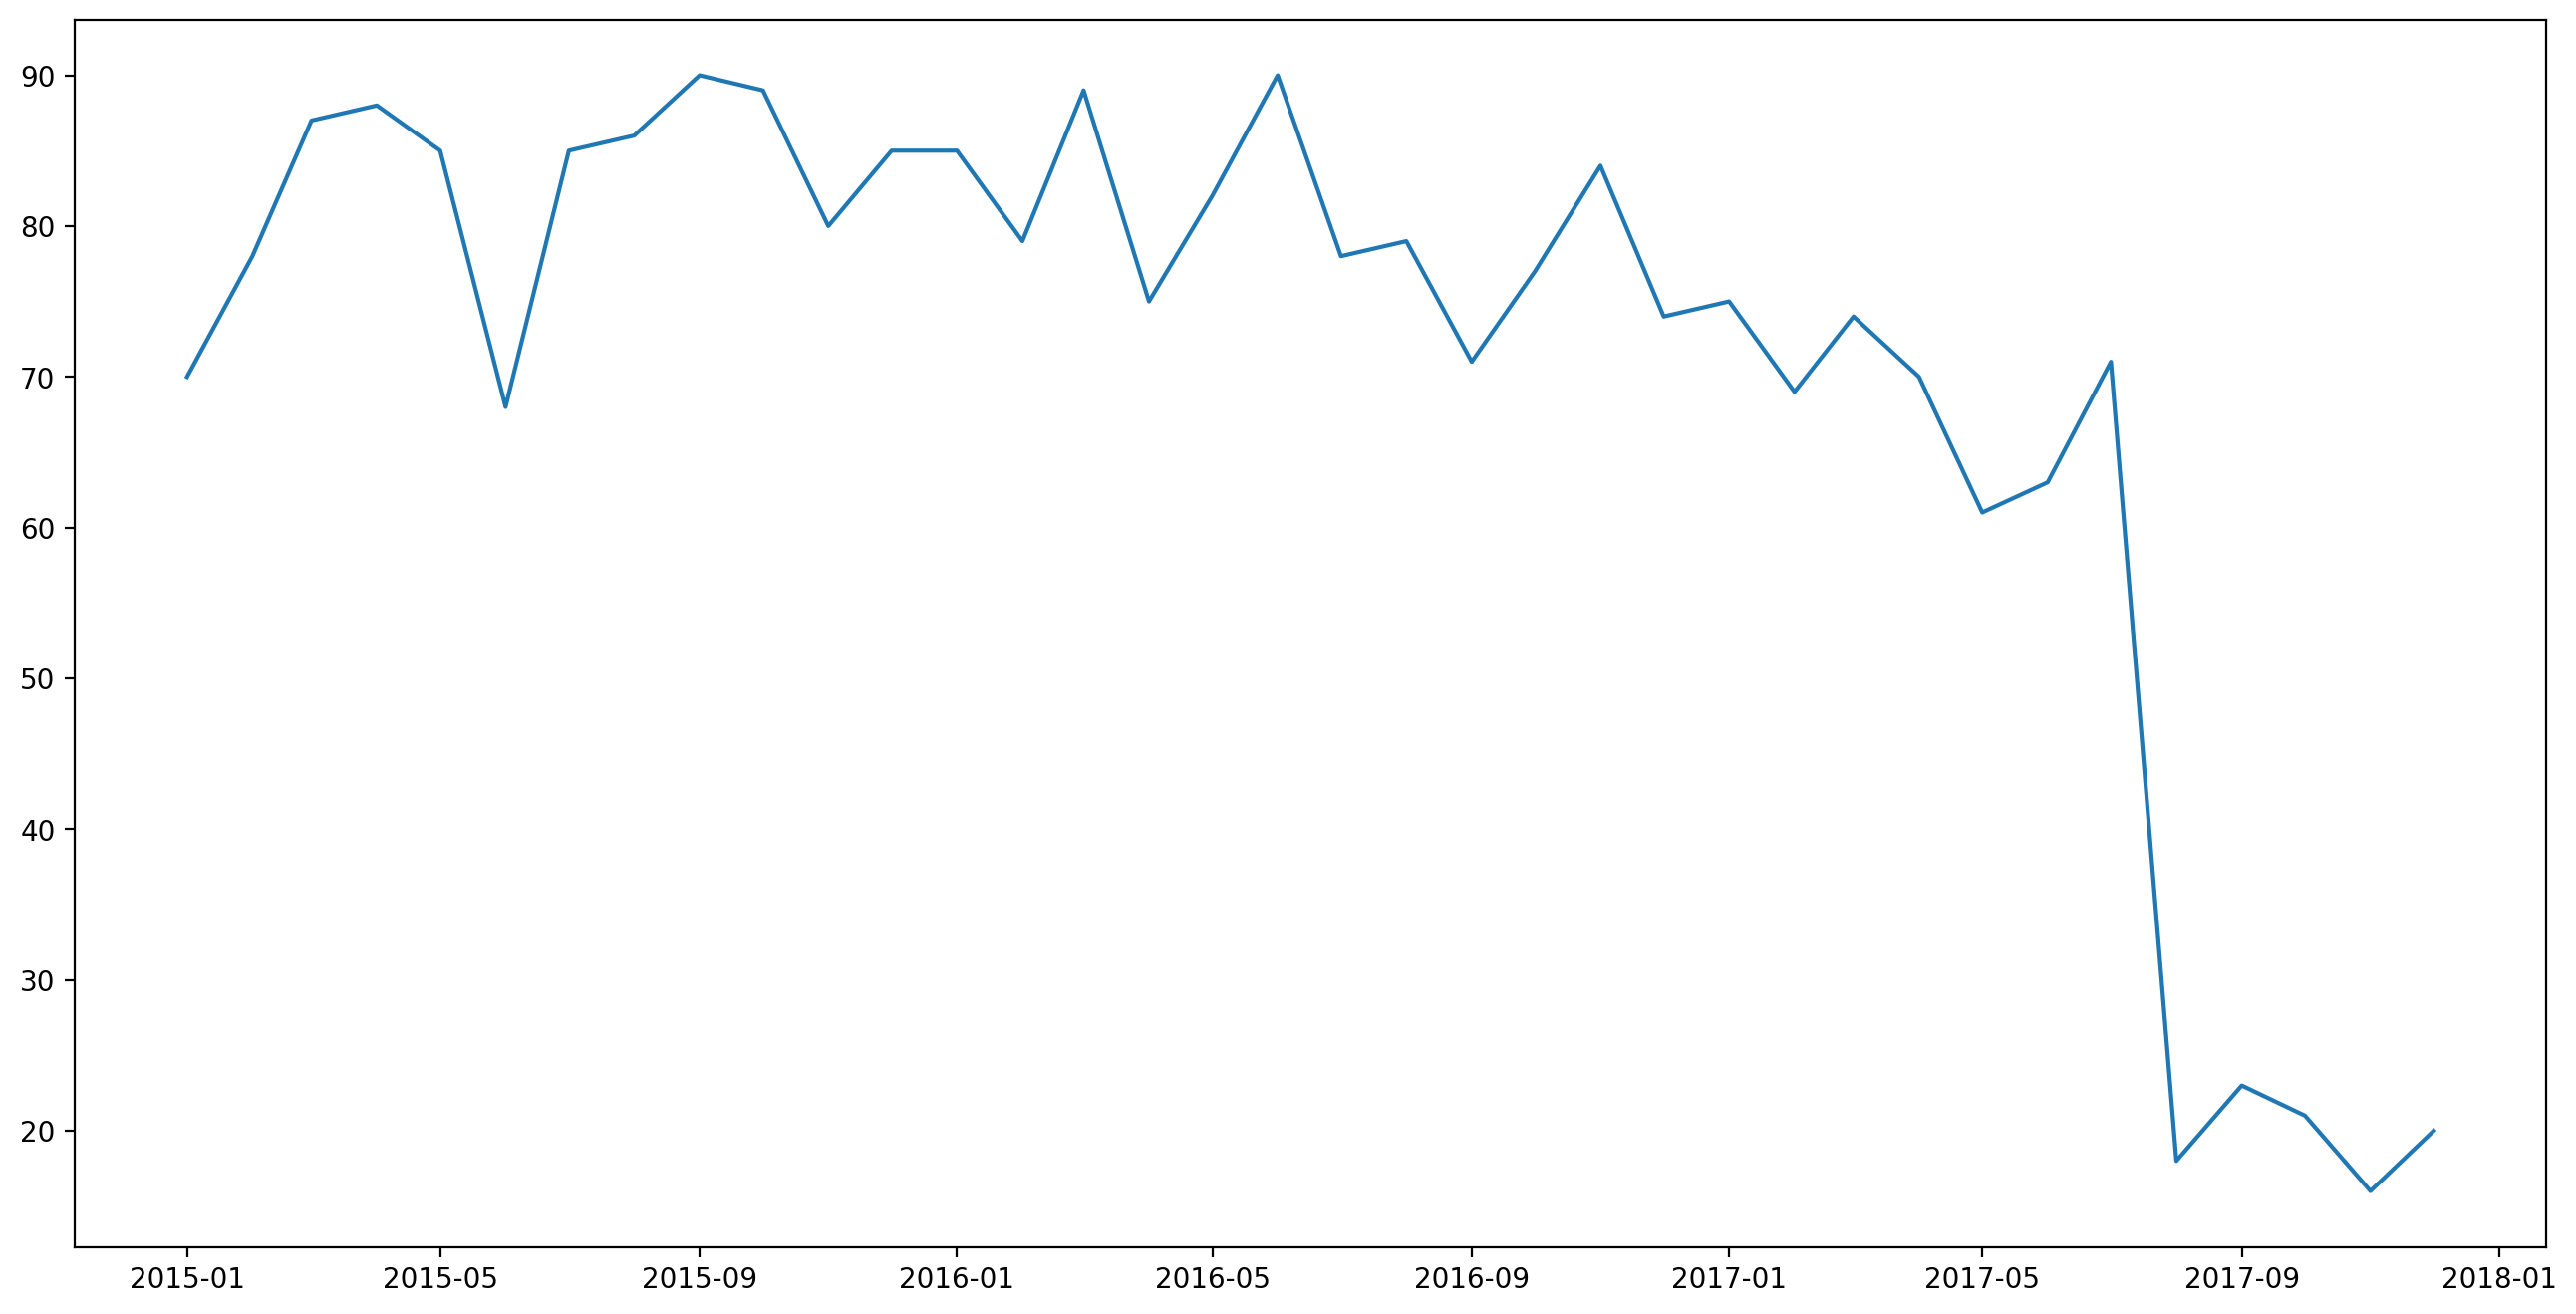

In [ ]:
plt.figure(figsize = (16,8),dpi = 200)
plt.plot(monthly_deaths["date"],monthly_deaths["count"])
plt.show()